[[0.20106357 0.19558221 0.19650748 0.2009692  0.2058775 ]
 [0.19611274 0.2029988  0.20540804 0.19696537 0.19851501]
 [0.20023607 0.19565217 0.20469399 0.19471839 0.20469941]
 ...
 [0.19622386 0.21060808 0.18756238 0.19944626 0.20615941]
 [0.20054047 0.20106512 0.20237158 0.1974776  0.19854519]
 [0.20802    0.20293812 0.19802068 0.19467235 0.19634879]]


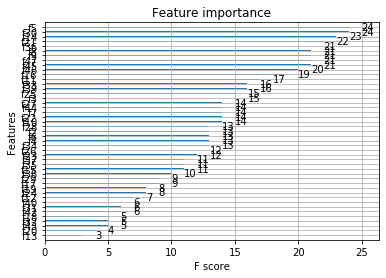

In [14]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from xgboost import plot_importance
from matplotlib import pyplot
import xgboost as xgb
import numpy as np
 
iris = datasets.load_iris()
X = iris.data
x = np.genfromtxt('train_data.csv',delimiter=',',skip_header=1)
# print('csv file:', x)
# print('irisdata:', type(X))

Y= iris.target
y = np.genfromtxt('train_target.csv',delimiter=',',skip_header=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
param = {'max_depth': 3, 'eta': 0.3,'silent': 1,
         'objective': 'multi:softprob','num_class':5}
num_round = 20
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)
print (preds)
#feature importance요
plot_importance(bst)
pyplot.show()